# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt


The Ridge loss function is defined as:

$$E(w) = 0.5\sum_{n=1}^N (w^Tx_n - y_n )^2 + \lambda \lVert w \rVert^2_2$$

Therefore, the gradient is:

$$\nabla E(w) = \sum_{n=1}^N (w^Tx_n - y_n )x_n + 2\lambda w$$

In [2]:
# Define functions
def ridge_loss(X, y, weights, ridge):
    return 0.5*np.sum((np.dot(X,weights) - y) ** 2) + ridge * np.sum(weights ** 2)**0.5

def ridge_grad(X, y, weights, ridge):
    return 2 * ridge * weights +  np.dot(X.T, np.dot(X, weights) - y)/len(y)

def compute_step(X, y, weights, ridge, lr):
    gradient = ridge_grad(X, y, weights, ridge)
    step = lr * gradient 
    return step

# From HW2
def generate_rnd_data(feature_size, sample_size, bias=False):
    # Generate X matrix
    data = np.concatenate((np.random.randn(sample_size, feature_size), np.ones((sample_size, 1))), axis=1) \
        if bias else np.random.randn(sample_size, feature_size)  # the first dimension is sample_size (n X d)

    # Generate ground truth model
    # If bias == T: then #rows + 1
    truth_model = np.random.randn(feature_size + 1, 1) * 10 \
        if bias else np.random.randn(feature_size, 1) * 10

    # Generate labels
    label = np.dot(data, truth_model)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)
    return data, label, truth_model

Text(0.5, 1.0, 'Ridge Regression Loss')

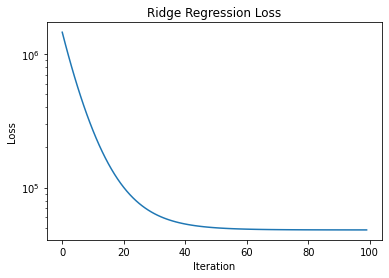

In [3]:
# Question 1
X,y,_= generate_rnd_data(50, 1000, True) # generate fake data

w = np.random.randn(51, 1) # initial random weights

ridge = 0.1
loss = []
for i in range(100):
    loss.append(ridge_loss(X, y, w, ridge))
    w -=  compute_step(X, y, w, ridge, 0.1)
plt.plot(loss)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Ridge Regression Loss")

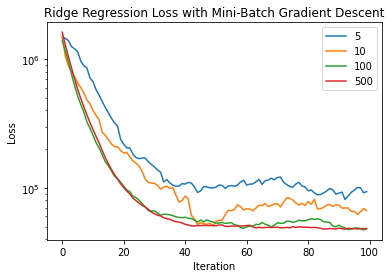

In [4]:
# Question 2
batch_sizes = [5, 10, 100, 500]
losses = np.zeros((len(batch_sizes), 100))
for N, batch_size in enumerate(batch_sizes):
    w = np.random.randn(51, 1)
    for i in range(100):
        idx = np.random.choice(len(X), batch_size, replace=False)
        losses[N,i] = ridge_loss(X, y, w, ridge)
        w -=  compute_step(X[idx], y[idx], w, 0.1, 0.1)

for N, batch_size in enumerate(batch_sizes):
    plt.plot(losses[N], label=batch_size)

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Ridge Regression Loss with Mini-Batch Gradient Descent")

plt.legend()

# Logistic Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [6]:
# Cute cat picture to start the code
Image(url='https://github.com/KyleTaft/Fall23/blob/701184602746cbdcaeede54072cb504eb0f1cda4/CMSE491/ICA/guh.JPG?raw=true', width=300)

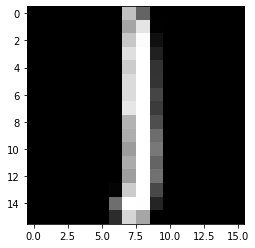

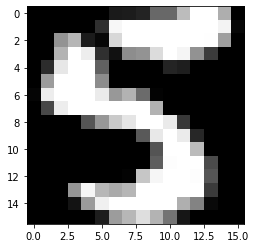

In [7]:
# Question 4

# Importing the dataset
train = pd.read_csv('ZipDigits.train', delimiter = ' ', header = None, index_col = 0)
test = pd.read_csv('ZipDigits.test', delimiter = ' ', header = None, index_col = 0)

# Take off last column
train = train.iloc[:, :-1]
test = test.iloc[:, :-1]

# Choose only 1 and 5 digits
train = train.loc[[1,5]]
test = test.loc[[1,5]]
example1 = train.iloc[0].to_numpy().reshape(16,16)
example2 = train.iloc[1530].to_numpy().reshape(16,16)

plt.imshow(example1, cmap='gray')
plt.show()
plt.imshow(example2, cmap='gray')
plt.show()

In [8]:
# Question 5

# Calculate average intensity of each digit
mean1 = train.loc[1].mean(axis=1) # mean of each mean of each image
mean5 = train.loc[5].mean(axis=1)


# Symmetrize the data
train_flip = train.copy()
test_flip = test.copy()

# Flip the images
for i in range(train_flip.shape[0]):
    train_flip.iloc[i] = np.fliplr(train_flip.iloc[i].to_numpy().reshape(16,16)).reshape(1,256)

for i in range(test_flip.shape[0]):
    test_flip.iloc[i] = np.fliplr(test_flip.iloc[i].to_numpy().reshape(16,16)).reshape(1,256)

symm1 =  -np.abs(train.loc[1] - train_flip.loc[1]).mean(axis=1)
symm5 = -np.abs(train.loc[5] - train_flip.loc[5]).mean(axis=1)


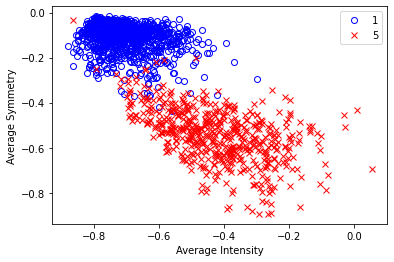

In [9]:
# Question 6
plt.plot(mean1, symm1, 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(mean5, symm5, 'x', color = 'red', label = '5')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.legend()

In [10]:
# Question 7
def log_loss(X, y, weights):
    return np.sum(np.log(1 + np.exp(-y * np.dot(X, weights))))/len(y)

def log_grad(X, y, weights):
    grad = np.zeros(len(weights))
    for i in range(len(y)):
        grad += -y[i] * X[i] / (1 + np.exp(y[i] * np.dot(X[i], weights)))
    return grad

def compute_step(X, y, weights, lr):
    gradient = log_grad(X, y, weights)/len(y)
    step = lr * gradient 
    return step

In [11]:
# Make labels -1 and 1
labels = train.index.to_numpy()
labels[labels == 5] = -1

test_labels = test.index.to_numpy()
test_labels[test_labels == 5] = -1

# Put data all into X
X = np.array([[train.mean(axis=1), -np.abs(train - train_flip).mean(axis=1)]]).T[:,:,0]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_test = np.array([[test.mean(axis=1), -np.abs(test - test_flip).mean(axis=1)]]).T[:,:,0]
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

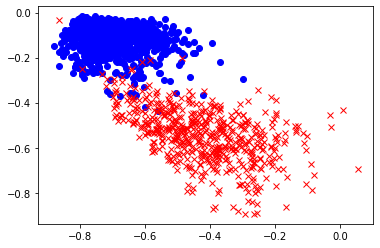

In [12]:
plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')

Text(0.5, 1.0, 'Loss vs. Iteration')

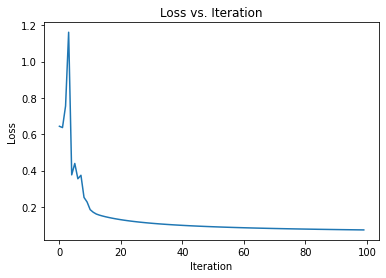

In [13]:
loss = []
w = np.ones(X.shape[1])
for i in range(100):
    loss.append(log_loss(X, labels, w))
    w -=  compute_step(X, labels, w, 10)

plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')

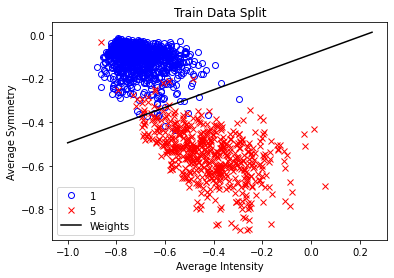

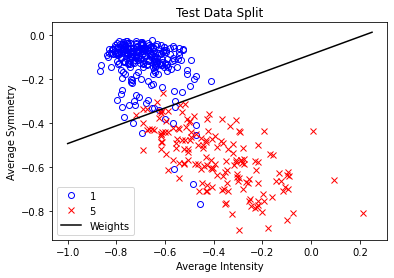

In [14]:
plt.figure()
plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')

x1 = np.linspace(-1, 0.25, 100)
x2 = (-w[0] - w[1]*x1)/w[2]
plt.plot(x1, x2, color = 'black', label = 'Weights')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.title("Train Data Split")
plt.legend()

plt.figure()
plt.plot(X_test[:,1][test_labels==1], X_test[:,2][test_labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X_test[:,1][test_labels==-1], X_test[:,2][test_labels==-1], 'x', color = 'red', label = '5')

x1 = np.linspace(-1, 0.25, 100)
x2 = (-w[0] - w[1]*x1)/w[2]
plt.plot(x1, x2, color = 'black', label = 'Weights')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.title("Test Data Split")
plt.legend()


In [15]:
#Question 9
print("Training loss: ", log_loss(X, labels, w))

print("Training accuracy: ", np.sum(np.sign(np.dot(X, w))== labels)/len(labels))

print("Test loss: ", log_loss(X_test, test_labels, w))

print("Test accuracy: ", np.sum(np.sign(np.dot(X_test, w))== test_labels)/len(test_labels))

Training loss:  0.07357503231088489
Training accuracy:  0.9795003203074952
Test loss:  0.13640200438287872
Test accuracy:  0.964622641509434


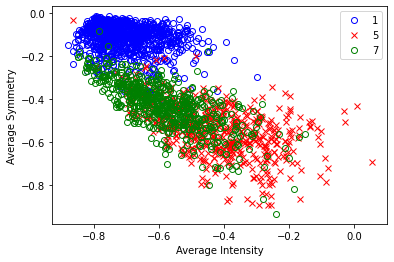

In [16]:
# Question 10

train = pd.read_csv('ZipDigits.train', delimiter = ' ', header = None, index_col = 0)
test = pd.read_csv('ZipDigits.test', delimiter = ' ', header = None, index_col = 0)

# Take off last column
train = train.iloc[:, :-1]
test = test.iloc[:, :-1]

# Choose only 1 and 5 digits
train = train.loc[[1,5,7]]
test = test.loc[[1,5,7]]

train_flip = train.copy()
# Flip the images
for i in range(train_flip.shape[0]):
    train_flip.iloc[i] = np.fliplr(train_flip.iloc[i].to_numpy().reshape(16,16)).reshape(1,256)

test_flip = test.copy()
for i in range(test_flip.shape[0]):
    test_flip.iloc[i] = np.fliplr(test_flip.iloc[i].to_numpy().reshape(16,16)).reshape(1,256)

# Question 10

# Make labels -1 and 1
labels = train.index.to_numpy()
labels[labels == 5] = -1
labels[labels == 7] = -2

test_labels = test.index.to_numpy()
test_labels[test_labels == 5] = -1
test_labels[test_labels == 7] = -2

# Put data all into X
X = np.array([[train.mean(axis=1), -np.abs(train - train_flip).mean(axis=1)]]).T[:,:,0]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_test = np.array([[test.mean(axis=1), -np.abs(test - test_flip).mean(axis=1)]]).T[:,:,0]
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')
plt.plot(X[:,1][labels==-2], X[:,2][labels==-2], 'o', color = 'green', label = '7', markerfacecolor='none')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.legend()

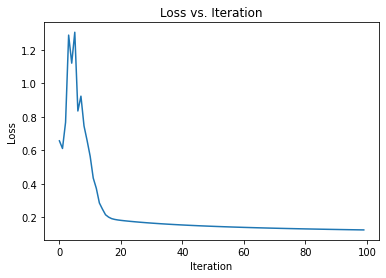

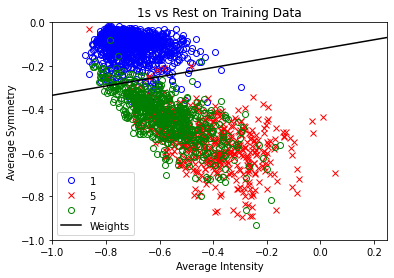

In [17]:
labelsnew = labels.copy()
labelsnew[labelsnew == -2] = -1

loss = []
w = np.ones(X.shape[1])
for i in range(100):
    loss.append(log_loss(X, labelsnew, w))
    w -=  compute_step(X, labelsnew, w, 10)
plt.figure()
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')


plt.figure()
plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')
plt.plot(X[:,1][labels==-2], X[:,2][labels==-2], 'o', color = 'green', label = '7', markerfacecolor='none')

x1 = np.linspace(-1, 0.25, 100)
x2 = (-w[0] - w[1]*x1)/w[2]
plt.plot(x1, x2, color = 'black', label = 'Weights')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.title("1s vs Rest on Training Data")
plt.legend()
plt.xlim(-1, 0.25)
plt.ylim(-1, 0)

w1 = w.copy()

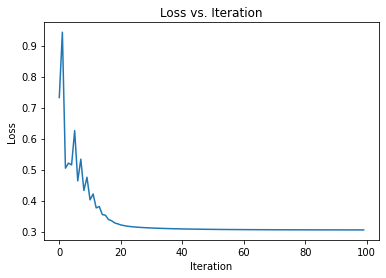

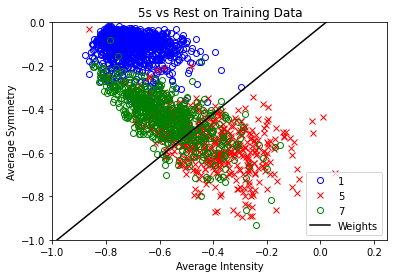

In [18]:
labelsnew = labels.copy()
labelsnew[labelsnew == 1] = -3 #
labelsnew[labelsnew == -1] = 1
labelsnew[labelsnew == -3] = -1
labelsnew[labelsnew == -2] = -1

loss = []
w = np.ones(X.shape[1])
for i in range(100):
    loss.append(log_loss(X, labelsnew, w))
    w -=  compute_step(X, labelsnew, w, 10)
plt.figure()
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')


plt.figure()
plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')
plt.plot(X[:,1][labels==-2], X[:,2][labels==-2], 'o', color = 'green', label = '7', markerfacecolor='none')

x1 = np.linspace(-1, 0.25, 100)
x2 = (-w[0] - w[1]*x1)/w[2]
plt.plot(x1, x2, color = 'black', label = 'Weights')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.title("5s vs Rest on Training Data")
plt.legend()
plt.xlim(-1, 0.25)
plt.ylim(-1, 0)

w5 = w.copy()

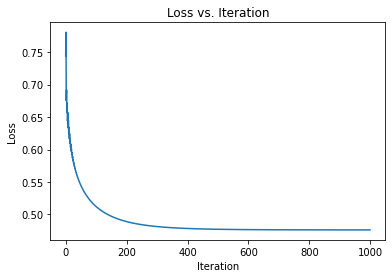

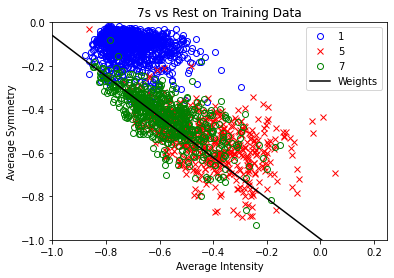

In [19]:
labelsnew = labels.copy()
labelsnew[labelsnew == 1] = -1
labelsnew[labelsnew == -2] = 1

loss = []
w = np.ones(X.shape[1])
for i in range(1000):
    loss.append(log_loss(X, labelsnew, w))
    w -=  compute_step(X, labelsnew, w, 7)
plt.figure()
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')


plt.figure()
plt.plot(X[:,1][labels==1], X[:,2][labels==1], 'o', color = 'blue', label = '1', markerfacecolor='none')
plt.plot(X[:,1][labels==-1], X[:,2][labels==-1], 'x', color = 'red', label = '5')
plt.plot(X[:,1][labels==-2], X[:,2][labels==-2], 'o', color = 'green', label = '7', markerfacecolor='none')

x1 = np.linspace(-1, 0.25, 100)
x2 = (-w[0] - w[1]*x1)/w[2]
plt.plot(x1, x2, color = 'black', label = 'Weights')
plt.xlabel('Average Intensity')
plt.ylabel('Average Symmetry')
plt.title("7s vs Rest on Training Data")
plt.legend()
plt.xlim(-1, 0.25)
plt.ylim(-1, 0)

w7 = w.copy()

In [20]:
def logistic(X, w):
    return 1/(1 + np.exp(-np.dot(X, w)))

print("1 probability: ", logistic(X_test[0], w1))
print("5 probability: ", logistic(X_test[0], w5))
print("7 probability: ", logistic(X_test[0], w7))


1 probability:  0.3178375410696607
5 probability:  0.07199656400800178
7 probability:  0.38596882235376867


In [21]:
prediction = []
for point in X_test:
    if logistic(point, w1) > logistic(point, w5) and logistic(point, w1) > logistic(point, w7):
        prediction.append(1)
    elif logistic(point, w5) > logistic(point, w1) and logistic(point, w5) > logistic(point, w7):
        prediction.append(5)
    else:
        prediction.append(7)

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt  # Optional for visualization
import seaborn as sns  # Optional for visualization
fixed_test_labels = test_labels.copy()
fixed_test_labels[fixed_test_labels == -2] = 7
fixed_test_labels[fixed_test_labels == -1] = 5
cm = confusion_matrix(fixed_test_labels, prediction)


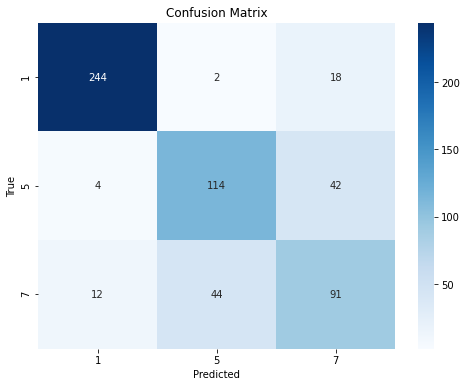

In [24]:
classes = [1, 5, 7]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
